##Let the scraping begin

In [550]:
import requests
import urlparse
import os
import pickle

def get_file(url):
    '''
    Takes url and returns a requests.get(url)
    
    Furthermore, create and saves directories/subdirectories and files from a url into your current working directory.
    Thus, you will not have to make more than one request per url.
    However, the function will not check if the file has been updated just if it was downloaded from before.
    
    Also, if the url is bad then it will print an Error and will return None
    '''
    parsed_url = urlparse.urlparse(url)
    path = []
    for item in parsed_url:
        for x in item.split("/"):
            if x != '':
                path.append(x)
    outfile = path[-1]
    path = path[:-1]
    outpath = '/'.join(path)
    
    if not os.path.exists(outpath):
        os.makedirs(outpath)
    if not os.path.isfile(outpath + '/' + outfile + '.p'):
        r = requests.get(url)
        if r.status_code != requests.codes.ok:
            print 'Error: request.get(url) Status NOT 200'
            return None 
        pickle.dump(r, open('{}'.format(outpath + '/' + outfile + '.p'), 'wb'))
    else:
        r = pickle.load(open('{}'.format(outpath + '/' + outfile + '.p'), 'rb'))
    return r        

Below gets the information from boxofficemojo.com:
 - top 200 films based on the total gross released in between 2009-2014

In [551]:
import pandas as pd
from bs4 import BeautifulSoup
#import unicodedata


url_list=['http://www.boxofficemojo.com/yearly/chart/?page=1&view=releasedate&view2=domestic&yr=2014&p=.htm', 
          'http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2014&p=.htm',
         'http://www.boxofficemojo.com/yearly/chart/?yr=2013&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
         'http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2013&p=.htm',
         'http://www.boxofficemojo.com/yearly/chart/?yr=2012&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
         'http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2012&p=.htm',
         'http://www.boxofficemojo.com/yearly/chart/?yr=2011&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
         'http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2011&p=.htm',
         'http://www.boxofficemojo.com/yearly/chart/?yr=2010&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
         'http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2010&p=.htm',
         'http://www.boxofficemojo.com/yearly/chart/?yr=2009&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
         'http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2009&p=.htm']

mainlist = []
count=0
for url in url_list:
    r = get_file(url)
    soup = BeautifulSoup(r.text)
    
        ###just to find the correct table###
    #u = 'Movie Title'
    #for i in xrange(len(soup.findAll('table'))):
    #    if u in unicodedata.normalize('NFKD', soup.findAll('table')[i].text).encode('ascii','ignore'):
    #    print i

    soup = soup.findAll('table')[6]
    rows = soup.findAll('tr',{'bgcolor':['#ffffff','#f4f4ff']})
    for row in range(len(rows)-2):
        lis = []

        for item in rows[row].findAll('td'):
            lis.append(item.text)
            
        mainlist.append(lis)
#df.append(lis)

df=pd.DataFrame(mainlist)        


Here is the dataframe. Of course it needs some cleaning and organizing:

In [552]:
df

,0,1,2,3,4,5,6,7,8
0,1,American Sniper,WB,"$350,126,372","3,885","$633,456",4,12/25,6/25
1,2,The Hunger Games: Mockingjay - Part 1,LGF,"$337,135,885","4,151","$121,897,634","4,151",11/21,3/19
2,3,Guardians of the Galaxy,BV,"$333,176,600","4,088","$94,320,883","4,080",8/1,1/22
3,4,Captain America: The Winter Soldier,BV,"$259,766,572","3,938","$95,023,721","3,938",4/4,8/21
4,5,The LEGO Movie,WB,"$257,760,692","3,890","$69,050,279","3,775",2/7,9/4
5,6,The Hobbit: The Battle of the Five Armies,WB,"$255,119,788","3,875","$54,724,334","3,875",12/17,4/2
6,7,Transformers: Age of Extinction,Par.,"$245,439,076","4,233","$100,038,390","4,233",6/27,10/9
7,8,Maleficent,BV,"$241,410,378","3,948","$69,431,298","3,948",5/30,12/4
8,9,X-Men: Days of Future Past,Fox,"$233,921,534","4,001","$90,823,660","3,996",5/23,10/9
9,10,Big Hero 6,BV,"$222,527,828","3,773","$56,215,889","3,761",11/7,5/28


In [553]:
df.columns = ['Rank', 'Movie', 'Distributor Abbrv', 'Total Gross', 'LT Theaters','Opening Weekend', 'Opening Theaters','Opening Date','Closing Date']

In [554]:
df.head(15)

,Rank,Movie,Distributor Abbrv,Total Gross,LT Theaters,Opening Weekend,Opening Theaters,Opening Date,Closing Date
0,1,American Sniper,WB,"$350,126,372","3,885","$633,456",4,12/25,6/25
1,2,The Hunger Games: Mockingjay - Part 1,LGF,"$337,135,885","4,151","$121,897,634","4,151",11/21,3/19
2,3,Guardians of the Galaxy,BV,"$333,176,600","4,088","$94,320,883","4,080",8/1,1/22
3,4,Captain America: The Winter Soldier,BV,"$259,766,572","3,938","$95,023,721","3,938",4/4,8/21
4,5,The LEGO Movie,WB,"$257,760,692","3,890","$69,050,279","3,775",2/7,9/4
5,6,The Hobbit: The Battle of the Five Armies,WB,"$255,119,788","3,875","$54,724,334","3,875",12/17,4/2
6,7,Transformers: Age of Extinction,Par.,"$245,439,076","4,233","$100,038,390","4,233",6/27,10/9
7,8,Maleficent,BV,"$241,410,378","3,948","$69,431,298","3,948",5/30,12/4
8,9,X-Men: Days of Future Past,Fox,"$233,921,534","4,001","$90,823,660","3,996",5/23,10/9
9,10,Big Hero 6,BV,"$222,527,828","3,773","$56,215,889","3,761",11/7,5/28


In [555]:
df['Total Gross'] = df['Total Gross'].str.replace('$','')
df['Opening Weekend'] = df['Opening Weekend'].str.replace('$','')
df['Total Gross'] = df['Total Gross'].str.replace(',','')
df['Opening Weekend'] = df['Opening Weekend'].str.replace(',','')
df['LT Theaters'] = df['LT Theaters'].str.replace(',','')
df['Opening Theaters'] = df['Opening Theaters'].str.replace(',','')

In [556]:
df.describe()

,Rank,Movie,Distributor Abbrv,Total Gross,LT Theaters,Opening Weekend,Opening Theaters,Opening Date,Closing Date
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,200,1200,86,1200,968,1190,811,323,326
top,178,Sunshine Cleaning,WB,5672846,3555,N/A,4,12/25,-
freq,6,1,113,1,5,11,78,25,16


I do not have the year information in my dataframe but since the order is known, it can be added:

In [557]:
df['Year'] = 0

In [558]:
df['Year'][0:200] = 2014
df['Year'][201:400] = 2013
df['Year'][401:600] = 2012
df['Year'][601:800] = 2011
df['Year'][801:1000] = 2010
df['Year'][1001:1200] = 2009

/Users/oksitosin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/oksitosin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/oksitosin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_ne

In [559]:
df.head(5)

,Rank,Movie,Distributor Abbrv,Total Gross,LT Theaters,Opening Weekend,Opening Theaters,Opening Date,Closing Date,Year
0,1,American Sniper,WB,350126372,3885,633456,4,12/25,6/25,2014
1,2,The Hunger Games: Mockingjay - Part 1,LGF,337135885,4151,121897634,4151,11/21,3/19,2014
2,3,Guardians of the Galaxy,BV,333176600,4088,94320883,4080,8/1,1/22,2014
3,4,Captain America: The Winter Soldier,BV,259766572,3938,95023721,3938,4/4,8/21,2014
4,5,The LEGO Movie,WB,257760692,3890,69050279,3775,2/7,9/4,2014


Below functions are just to have a decent and accurate opening and closing dates for a given movie.

First I created a temporary closing date for the movie and then based on the condition, it will change into the actual closing date. (Thank you Jon)

(I know the column and variable names don't make too much sense, I will change)

In [560]:
df['Year'] = df['Year'].apply(lambda x: str(x))

In [561]:
df['Opening Date2'] = df['Opening Date']+'/'+df['Year']

In [562]:
df['Closing Date2'] = df['Closing Date']+'/'+df['Year']

In [563]:
df.head()

,Rank,Movie,Distributor Abbrv,Total Gross,LT Theaters,Opening Weekend,Opening Theaters,Opening Date,Closing Date,Year,Opening Date2,Closing Date2
0,1,American Sniper,WB,350126372,3885,633456,4,12/25,6/25,2014,12/25/2014,6/25/2014
1,2,The Hunger Games: Mockingjay - Part 1,LGF,337135885,4151,121897634,4151,11/21,3/19,2014,11/21/2014,3/19/2014
2,3,Guardians of the Galaxy,BV,333176600,4088,94320883,4080,8/1,1/22,2014,8/1/2014,1/22/2014
3,4,Captain America: The Winter Soldier,BV,259766572,3938,95023721,3938,4/4,8/21,2014,4/4/2014,8/21/2014
4,5,The LEGO Movie,WB,257760692,3890,69050279,3775,2/7,9/4,2014,2/7/2014,9/4/2014


In [564]:
df['Opening Date2'] = pd.to_datetime(df['Opening Date2'])

In [565]:
df['Closing Date2'] = pd.to_datetime(df['Closing Date2'])

In [566]:
df.head()

,Rank,Movie,Distributor Abbrv,Total Gross,LT Theaters,Opening Weekend,Opening Theaters,Opening Date,Closing Date,Year,Opening Date2,Closing Date2
0,1,American Sniper,WB,350126372,3885,633456,4,12/25,6/25,2014,2014-12-25,2014-06-25
1,2,The Hunger Games: Mockingjay - Part 1,LGF,337135885,4151,121897634,4151,11/21,3/19,2014,2014-11-21,2014-03-19
2,3,Guardians of the Galaxy,BV,333176600,4088,94320883,4080,8/1,1/22,2014,2014-08-01,2014-01-22
3,4,Captain America: The Winter Soldier,BV,259766572,3938,95023721,3938,4/4,8/21,2014,2014-04-04,2014-08-21
4,5,The LEGO Movie,WB,257760692,3890,69050279,3775,2/7,9/4,2014,2014-02-07,2014-09-04


In [567]:
df.dtypes

Rank                         object
Movie                        object
Distributor Abbrv            object
Total Gross                  object
LT Theaters                  object
Opening Weekend              object
Opening Theaters             object
Opening Date                 object
Closing Date                 object
Year                         object
Opening Date2        datetime64[ns]
Closing Date2        datetime64[ns]
dtype: object

It is nice to have separete columns only for opening and closing months for the movie:

In [568]:
df['Opening Month']=df['Opening Date2'].dt.month

In [569]:
df['Closing Month']=df['Closing Date2'].dt.month

In [570]:
df.head()

,Rank,Movie,Distributor Abbrv,Total Gross,LT Theaters,Opening Weekend,Opening Theaters,Opening Date,Closing Date,Year,Opening Date2,Closing Date2,Opening Month,Closing Month
0,1,American Sniper,WB,350126372,3885,633456,4,12/25,6/25,2014,2014-12-25,2014-06-25,12,6
1,2,The Hunger Games: Mockingjay - Part 1,LGF,337135885,4151,121897634,4151,11/21,3/19,2014,2014-11-21,2014-03-19,11,3
2,3,Guardians of the Galaxy,BV,333176600,4088,94320883,4080,8/1,1/22,2014,2014-08-01,2014-01-22,8,1
3,4,Captain America: The Winter Soldier,BV,259766572,3938,95023721,3938,4/4,8/21,2014,2014-04-04,2014-08-21,4,8
4,5,The LEGO Movie,WB,257760692,3890,69050279,3775,2/7,9/4,2014,2014-02-07,2014-09-04,2,9


In [571]:
df['Opening Month'] = df['Opening Month'].apply(lambda x: int(x))
df['Closing Month'] = df['Closing Month'].apply(lambda x: int(x))

In [572]:
df['Year'] = df['Year'].apply(lambda x: int(x))

Here comes the column of my beautiful closing dates:

In [573]:
df['Change Closing Date']=df['Closing Date2'] < df['Opening Date2']

In [574]:
import numpy as np
df['Closing Date3'] = np.where(df['Change Closing Date'], 
                               pd.DatetimeIndex(df['Closing Date2']) + pd.DateOffset(years=1),
                               df['Closing Date2'])

In [575]:
df.head()

,Rank,Movie,Distributor Abbrv,Total Gross,LT Theaters,Opening Weekend,Opening Theaters,Opening Date,Closing Date,Year,Opening Date2,Closing Date2,Opening Month,Closing Month,Change Closing Date,Closing Date3
0,1,American Sniper,WB,350126372,3885,633456,4,12/25,6/25,2014,2014-12-25,2014-06-25,12,6,True,2015-06-25
1,2,The Hunger Games: Mockingjay - Part 1,LGF,337135885,4151,121897634,4151,11/21,3/19,2014,2014-11-21,2014-03-19,11,3,True,2015-03-19
2,3,Guardians of the Galaxy,BV,333176600,4088,94320883,4080,8/1,1/22,2014,2014-08-01,2014-01-22,8,1,True,2015-01-22
3,4,Captain America: The Winter Soldier,BV,259766572,3938,95023721,3938,4/4,8/21,2014,2014-04-04,2014-08-21,4,8,False,2014-08-21
4,5,The LEGO Movie,WB,257760692,3890,69050279,3775,2/7,9/4,2014,2014-02-07,2014-09-04,2,9,False,2014-09-04


So far, so good. In order to see how long a movie was on release, all we need is a couple of functions:

In [576]:
df['Days in Release']=df['Closing Date3']-df['Opening Date2']

In [577]:
df['Days in Release Int'] = df['Days in Release'].apply(lambda x: x/np.timedelta64(1, 'D'))

In [578]:
df['Weeks in Release Int']=(df['Days in Release Int']/7).apply(lambda x: int(x))

In [579]:
df.head()

,Rank,Movie,Distributor Abbrv,Total Gross,LT Theaters,Opening Weekend,Opening Theaters,Opening Date,Closing Date,Year,Opening Date2,Closing Date2,Opening Month,Closing Month,Change Closing Date,Closing Date3,Days in Release,Days in Release Int,Weeks in Release Int
0,1,American Sniper,WB,350126372,3885,633456,4,12/25,6/25,2014,2014-12-25,2014-06-25,12,6,True,2015-06-25,182 days,182,26
1,2,The Hunger Games: Mockingjay - Part 1,LGF,337135885,4151,121897634,4151,11/21,3/19,2014,2014-11-21,2014-03-19,11,3,True,2015-03-19,118 days,118,16
2,3,Guardians of the Galaxy,BV,333176600,4088,94320883,4080,8/1,1/22,2014,2014-08-01,2014-01-22,8,1,True,2015-01-22,174 days,174,24
3,4,Captain America: The Winter Soldier,BV,259766572,3938,95023721,3938,4/4,8/21,2014,2014-04-04,2014-08-21,4,8,False,2014-08-21,139 days,139,19
4,5,The LEGO Movie,WB,257760692,3890,69050279,3775,2/7,9/4,2014,2014-02-07,2014-09-04,2,9,False,2014-09-04,209 days,209,29


In [580]:
len(df)

1200

In [581]:
df.dtypes

Rank                             object
Movie                            object
Distributor Abbrv                object
Total Gross                      object
LT Theaters                      object
Opening Weekend                  object
Opening Theaters                 object
Opening Date                     object
Closing Date                     object
Year                              int64
Opening Date2            datetime64[ns]
Closing Date2            datetime64[ns]
Opening Month                     int64
Closing Month                     int64
Change Closing Date                bool
Closing Date3            datetime64[ns]
Days in Release         timedelta64[ns]
Days in Release Int             float64
Weeks in Release Int              int64
dtype: object

##Try -- what can we do for N/As?

Should we take the mean? Does it worth? Convert 'N/A' into 'nan'? 

#Ok, enough for now. Just drop N/As
##Life is more beautiful without N/As :)

In [582]:
df = df[(df['Opening Weekend'] != 'N/A') & (df['Opening Theaters'] != 'N/A') 
        & (df['LT Theaters'] != 'N/A') 
        & (df['Total Gross'] != 'N/A')] 

In [583]:
df[df['Opening Weekend'] == 'N/A']

,Rank,Movie,Distributor Abbrv,Total Gross,LT Theaters,Opening Weekend,Opening Theaters,Opening Date,Closing Date,Year,Opening Date2,Closing Date2,Opening Month,Closing Month,Change Closing Date,Closing Date3,Days in Release,Days in Release Int,Weeks in Release Int


In [584]:
len(df)

1189

I started with a df with 1200 rows and now 1189. Not bad.

Finally we can convert the following columns into integers. N/As did not let me to convert before:

In [585]:
df['Total Gross'] = df['Total Gross'].apply(lambda x: int(x))
df['LT Theaters'] = df['LT Theaters'].apply(lambda x: int(x))
df['Opening Weekend'] = df['Opening Weekend'].apply(lambda x: int(x))
df['Opening Theaters'] = df['Opening Theaters'].apply(lambda x: int(x))

/Users/oksitosin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/oksitosin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/oksitosin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [586]:
df.dtypes

Rank                             object
Movie                            object
Distributor Abbrv                object
Total Gross                       int64
LT Theaters                       int64
Opening Weekend                   int64
Opening Theaters                  int64
Opening Date                     object
Closing Date                     object
Year                              int64
Opening Date2            datetime64[ns]
Closing Date2            datetime64[ns]
Opening Month                     int64
Closing Month                     int64
Change Closing Date                bool
Closing Date3            datetime64[ns]
Days in Release         timedelta64[ns]
Days in Release Int             float64
Weeks in Release Int              int64
dtype: object

##To adjust or not to adjust? That is the question.

Inflation might have been a problem if I had wider range of data based on years. Since I only have releases in between 2009-2014 it won't be a problem.

I checked the ratios that box office mojo approximately uses as adjuster. 

I won't use them anyway.

In [587]:
rates = {2014: 8.39/8.17, 2013: 8.39/8.13, 2012: 8.39/7.96, 2011: 8.39/7.93, 2010: 8.39/7.89, 2009: 8.39/7.50}

In [588]:
pd.DataFrame(rates.items(), columns=['Year', 'Rate'])

,Year,Rate
0,2009,1.118667
1,2010,1.063371
2,2011,1.058008
3,2012,1.054020
4,2013,1.031980
5,2014,1.026928


## Merging with Pickles

I have 2 other dataframes I pickled. One for budgets - from the-numbers.com, and studios - again from boxofficemojo.com

In [589]:
#first file to merge 

with open('studios.pkl', 'r') as picklefile:
    studios = pickle.load(picklefile)

In [590]:
studios

,Distributor,Market Share,Distributor Abbrv
0,Universal,0.276,Uni.
1,Buena Vista,0.176,BV
2,Warner Bros.,0.162,WB
3,20th Century Fox,0.101,Fox
4,Paramount,0.069,Par.
5,Sony / Columbia,0.058,Sony


In [591]:
#second file to merge

with open('budget.pkl', 'r') as picklefile:
    budget = pickle.load(picklefile)

In [1297]:
print budget.sort()

                                                  Movie  Production Budget
0                                                Avatar          425000000
1              Pirates of the Caribbean: At World's End          300000000
2                                 The Dark Knight Rises          275000000
3                                       The Lone Ranger          275000000
4                                           John Carter          275000000
5                                               Tangled          260000000
6                                          Spider-Man 3          258000000
7                           The Avengers: Age of Ultron          250000000
8                     The Hobbit: An Unexpected Journey          250000000
9                Harry Potter and the Half-Blood Prince          250000000
10                  The Hobbit: The Desolation of Smaug          250000000
11            The Hobbit: The Battle of the Five Armies          250000000
12          Pirates of th

In [593]:
withstudios = studios.merge(df, on= 'Distributor Abbrv',how='outer')

In [594]:
len(withstudios)

1189

In [595]:
withstudios.head()

,Distributor,Market Share,Distributor Abbrv,Rank,Movie,Total Gross,LT Theaters,Opening Weekend,Opening Theaters,Opening Date,Closing Date,Year,Opening Date2,Closing Date2,Opening Month,Closing Month,Change Closing Date,Closing Date3,Days in Release,Days in Release Int,Weeks in Release Int
0,Universal,0.276,Uni.,20,Neighbors,150157400,3311,49033915,3279,5/9,8/21,2014,2014-05-09,2014-08-21,5,8,False,2014-08-21,104 days,104,14
1,Universal,0.276,Uni.,21,Ride Along,134938200,2867,41516170,2663,1/17,4/17,2014,2014-01-17,2014-04-17,1,4,False,2014-04-17,90 days,90,12
2,Universal,0.276,Uni.,24,Lucy,126663600,3202,43899340,3173,7/25,11/6,2014,2014-07-25,2014-11-06,7,11,False,2014-11-06,104 days,104,14
3,Universal,0.276,Uni.,26,Unbroken,115637895,3301,30621445,3131,12/25,3/12,2014,2014-12-25,2014-03-12,12,3,True,2015-03-12,77 days,77,11
4,Universal,0.276,Uni.,34,Non-Stop,92168600,3183,28875635,3090,2/28,5/29,2014,2014-02-28,2014-05-29,2,5,False,2014-05-29,90 days,90,12


In [596]:
withstudios.tail()

,Distributor,Market Share,Distributor Abbrv,Rank,Movie,Total Gross,LT Theaters,Opening Weekend,Opening Theaters,Opening Date,Closing Date,Year,Opening Date2,Closing Date2,Opening Month,Closing Month,Change Closing Date,Closing Date3,Days in Release,Days in Release Int,Weeks in Release Int
1184,NaN,NaN,Truly,179,Valentino: The Last Emperor,1755134,38,21762,1,3/18,8/30,2009,2009-03-18,2009-08-30,3,8,False,2009-08-30,165 days,165,23
1185,NaN,NaN,First,181,Bad Lieutenant: Port of Call New Orleans,1702112,96,245398,27,11/20,3/4,2009,2009-11-20,2009-03-04,11,3,True,2010-03-04,104 days,104,14
1186,NaN,NaN,Reg.,186,Departures,1498210,27,74945,9,5/29,6/24,2009,2009-05-29,2009-06-24,5,6,False,2009-06-24,26 days,26,3
1187,NaN,NaN,5&2,190,The Secrets of Jonathan Sperry,1355079,135,258400,117,9/18,5/13,2009,2009-09-18,2009-05-13,9,5,True,2010-05-13,237 days,237,33
1188,NaN,NaN,ICir,195,"Yoo-Hoo, Mrs. Goldberg",1134623,25,19302,2,7/10,1/7,2009,2009-07-10,2009-01-07,7,1,True,2010-01-07,181 days,181,25


In [597]:
len(df)

1189

A new df together with budget and studio:

In [1167]:
newdf = budget.merge(withstudios, on = 'Movie', how='inner')

In [851]:
newdf.head()

,Movie,Production Budget,Distributor,Market Share,Distributor Abbrv,Rank,Total Gross,LT Theaters,Opening Weekend,Opening Theaters,Opening Date,Closing Date,Year,Opening Date2,Closing Date2,Opening Month,Closing Month,Change Closing Date,Closing Date3,Days in Release,Days in Release Int,Weeks in Release Int
0,Not Easily Broken,5000000,NaN,NaN,SGem,138,10572742,725,5314278,724,1/9,2/8,2009,2009-01-09,2009-02-08,1,2,False,2009-02-08,30 days,30,4
1,Bride Wars,30000000,20th Century Fox,0.101,Fox,56,58715510,3228,21058173,3226,1/9,5/10,2009,2009-01-09,2009-05-10,1,5,False,2009-05-10,121 days,121,17
2,Paul Blart: Mall Cop,26000000,Sony / Columbia,0.058,Sony,19,146336178,3206,31832636,3144,1/16,5/25,2009,2009-01-16,2009-05-25,1,5,False,2009-05-25,129 days,129,18
3,Hotel for Dogs,75000000,NaN,NaN,P/DW,45,73034460,3271,17012212,3271,1/16,5/28,2009,2009-01-16,2009-05-28,1,5,False,2009-05-28,132 days,132,18
4,Inkheart,60000000,NaN,NaN,WB (NL),114,17303424,2655,7601379,2655,1/23,4/9,2009,2009-01-23,2009-04-09,1,4,False,2009-04-09,76 days,76,10


In [852]:
len(newdf)

778

In [853]:
newdf.columns

Index([u'Movie', u'Production Budget', u'Distributor', u'Market Share', u'Distributor Abbrv', u'Rank', u'Total Gross', u'LT Theaters', u'Opening Weekend', u'Opening Theaters', u'Opening Date', u'Closing Date', u'Year', u'Opening Date2', u'Closing Date2', u'Opening Month', u'Closing Month', u'Change Closing Date', u'Closing Date3', u'Days in Release', u'Days in Release Int', u'Weeks in Release Int'], dtype='object')

The new dataframe I have (newdf) has 778 rows after merges. I started with 1200. 

## Dummy variables for studios

I was considering to create categorical variables with the studios. I only take the ones have %5 or more market share. 

In [ ]:
# def set_bin(x):
#     studios = ['Uni.','BV','WB','Fox','Par.','Sony']
    
#     for s in studios:
#         if x['Distributor Abbrv'] == s:
#             s +=1
#             return 1 
#         else:
#             return 0

    
    

In [ ]:
#newdf.ix[newdf['Distributor Abbrv']=='Uni.']=1

In [ ]:
# newdf['studio_bin']=0

In [ ]:
# studios = ['Uni.','BV','WB','Fox','Par.','Sony']
# newdf['studio_bin']=newdf['Distributor Abbrv'].apply[lambda x: for s in studios, ]

In [ ]:


# if newdf['Distributor Abbrv'].item =='Uni.':
#     newdf['studio_bin']=1
# else:
#     if newdf['Distributor Abbrv'].item=='BV':
#         newdf['studio_bin']=1
#     else:

#         if newdf['Distributor Abbrv'].item=='WB':
#             newdf['studio_bin']=1
#         else:
#             if newdf['Distributor Abbrv'].item=='Fox':
#                 newdf['studio_bin']=1
# #         if newdf['Distributor Abbrv'].item=='Par.':
# #             newdf['studio_bin']=1
# #         if newdf['Distributor Abbrv'].item=='Sony':
# #             newdf['studio_bin']=1
# #         else:
# #             newdf['studio_bin']=0

In [ ]:
# newdf.head()

In [ ]:
# studios

##Getting Ready for Patsy

Patsy doesn't like the column names that have spaces in between.

In [1168]:
newdf.columns = ['Movie', 'ProductionBudget','Distributor', 'MarketShare',
       'DistributorAbbrv', 'Rank', 'TotalGross', 'LTTheaters',
       'OpeningWeekend', 'OpeningTheaters', 'OpeningDate',
       'ClosingDate', 'Year', 'OpeningDate2', 'ClosingDate2',
       'OpeningMonth', 'ClosingMonth', 'ChangeClosingDate',
       'ClosingDate3', 'DaysInRelease', 'DaysInReleaseInt',
       'WeeksInReleaseInt']

In [855]:
newdf.tail()

,Movie,ProductionBudget,Distributor,MarketShare,DistributorAbbrv,Rank,TotalGross,LTTheaters,OpeningWeekend,OpeningTheaters,OpeningDate,ClosingDate,Year,OpeningDate2,ClosingDate2,OpeningMonth,ClosingMonth,ChangeClosingDate,ClosingDate3,DaysInRelease,DaysInReleaseInt,WeeksInReleaseInt
773,Into the Woods,50000000,Buena Vista,0.176,BV,23,128002372,2833,31051923,2440,12/25,4/16,2014,2014-12-25,2014-04-16,12,4,True,2015-04-16,112 days,112,16
774,American Sniper,58000000,Warner Bros.,0.162,WB,1,350126372,3885,633456,4,12/25,6/25,2014,2014-12-25,2014-06-25,12,6,True,2015-06-25,182 days,182,26
775,Big Eyes,10000000,NaN,NaN,Wein.,120,14482031,1408,3001738,1307,12/25,3/26,2014,2014-12-25,2014-03-26,12,3,True,2015-03-26,91 days,91,13
776,Selma,20000000,Paramount,0.069,Par.,61,52076908,2235,571450,19,12/25,4/16,2014,2014-12-25,2014-04-16,12,4,True,2015-04-16,112 days,112,16
777,A Most Violent Year,20000000,NaN,NaN,A24,143,5749134,818,172788,4,12/31,-,2014,2014-12-31,2014-10-08,12,10,True,2015-10-08,281 days,281,40


I have a lot of columns I do not need actually. Below, I made a copy of my dataframe (newdf) to make it simpler.

In [1169]:
dfrm = newdf.copy()

In [1170]:
len(dfrm)

778

In [1171]:
dfrm.drop('Rank', axis=1, inplace=True)

In [1172]:
dfrm.drop('Distributor', axis=1, inplace=True)

In [1173]:
dfrm.drop('MarketShare', axis=1, inplace=True)

In [1174]:
dfrm.drop('DistributorAbbrv', axis=1, inplace=True)

In [1175]:
dfrm.drop('OpeningDate', axis=1, inplace=True)

In [1176]:
dfrm.drop('ClosingDate', axis=1, inplace=True)

In [1177]:
dfrm.drop('ClosingDate2', axis=1, inplace=True)

In [1178]:
dfrm.drop('ChangeClosingDate', axis=1, inplace=True)

In [1179]:
dfrm.drop('DaysInRelease', axis=1, inplace=True)

In [1180]:
dfrm.columns

Index([u'Movie', u'ProductionBudget', u'TotalGross', u'LTTheaters', u'OpeningWeekend', u'OpeningTheaters', u'Year', u'OpeningDate2', u'OpeningMonth', u'ClosingMonth', u'ClosingDate3', u'DaysInReleaseInt', u'WeeksInReleaseInt'], dtype='object')

In [868]:
dfrm.head()


,Movie,ProductionBudget,TotalGross,LTTheaters,OpeningWeekend,OpeningTheaters,Year,OpeningDate2,OpeningMonth,ClosingMonth,ClosingDate3,DaysInReleaseInt,WeeksInReleaseInt
0,Not Easily Broken,5000000,10572742,725,5314278,724,2009,2009-01-09,1,2,2009-02-08,30,4
1,Bride Wars,30000000,58715510,3228,21058173,3226,2009,2009-01-09,1,5,2009-05-10,121,17
2,Paul Blart: Mall Cop,26000000,146336178,3206,31832636,3144,2009,2009-01-16,1,5,2009-05-25,129,18
3,Hotel for Dogs,75000000,73034460,3271,17012212,3271,2009,2009-01-16,1,5,2009-05-28,132,18
4,Inkheart,60000000,17303424,2655,7601379,2655,2009,2009-01-23,1,4,2009-04-09,76,10


In [1181]:
dfrm = dfrm[(dfrm['Year'] != 0)]

##Recently added, will continue

In [618]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [619]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.mpl_style = 'default'

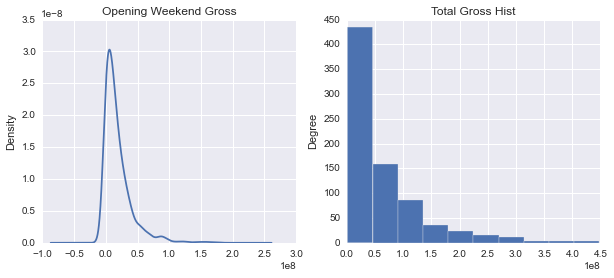

In [870]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,4))


dfrm.OpeningWeekend.plot(ax=axes[0], kind='kde',title='Opening Weekend Gross')
dfrm.TotalGross.plot(ax=axes[1],kind='hist',title='Total Gross Hist')
plt.title='Histogram'

In [926]:
monthly_gross = dfrm.groupby('OpeningMonth')['TotalGross'].agg(np.mean)

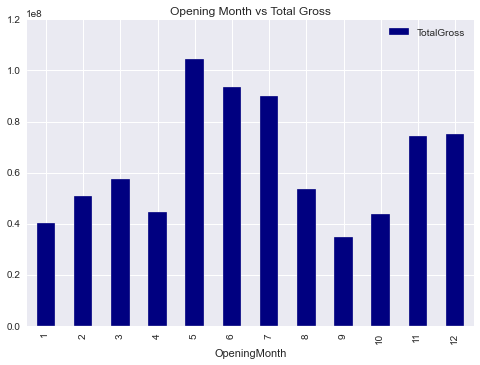

In [961]:
monthly_gross.plot(x='OpeningMonth', y='TotalGross', kind='Bar', title='Opening Month vs Total Gross', legend=True, color="navy")

In [929]:
monthly_openinggross = dfrm.groupby('OpeningMonth')['OpeningWeekend'].agg(np.mean)

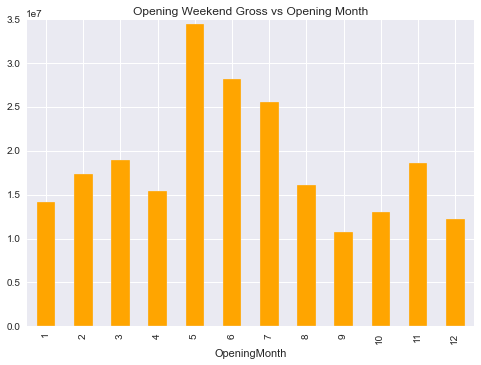

In [930]:
monthly_openinggross.plot(x='OpeningMonth', y='OpeningWeekend', kind='Bar', color='orange', title = 'Opening Weekend Gross vs Opening Month')

In [931]:
yearly_gross = dfrm.groupby('Year')['TotalGross'].agg(np.mean)

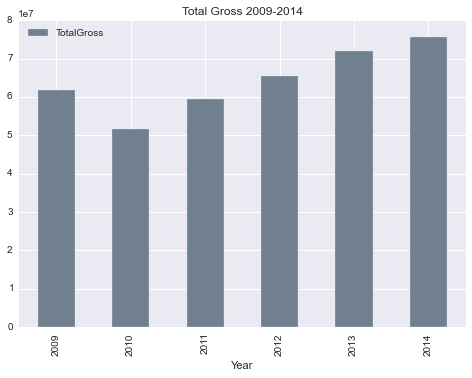

In [962]:
yearly_gross.plot(x='Year', y='TotalGross', kind='Bar', color='slategrey', title='Total Gross 2009-2014', legend=True)

In [934]:
monthly_LT = dfrm.groupby('OpeningMonth')['LTTheaters'].agg(np.mean)

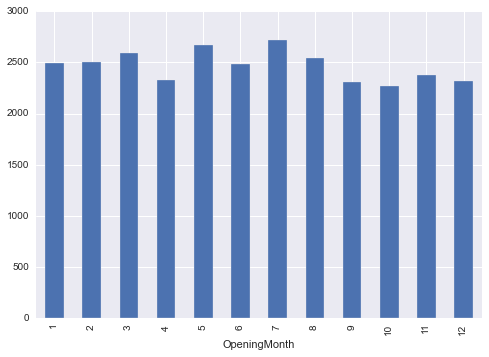

In [935]:
monthly_LT.plot(x='OpeningMonth', y='LTTheaters', kind='Bar', )

In [936]:
monthly_openingth = dfrm.groupby('OpeningMonth')['OpeningTheaters'].agg(np.mean)

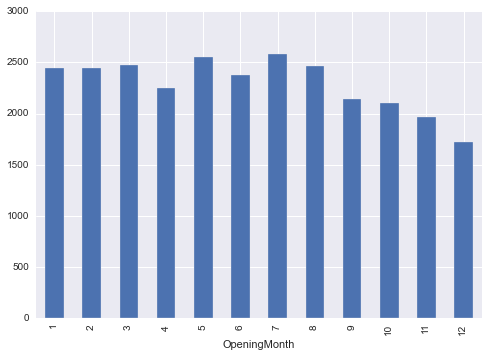

In [937]:
monthly_openingth.plot(x='OpeningMonth', y='OpeningTheaters', kind='Bar')

#Total Gross and Prod Budget logs

In [623]:
dfrm['TotalGrossLog'] = dfrm['TotalGross'].apply(lambda x: np.log(x))

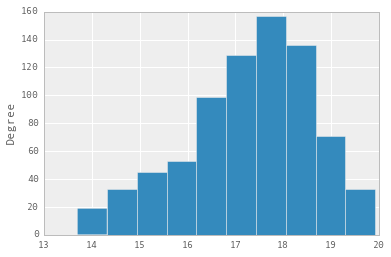

In [624]:
dfrm['TotalGrossLog'].plot(kind = 'hist')

In [626]:
dfrm['ProductionBudgetLog'] = dfrm['ProductionBudget'].apply(lambda x: np.log(x))

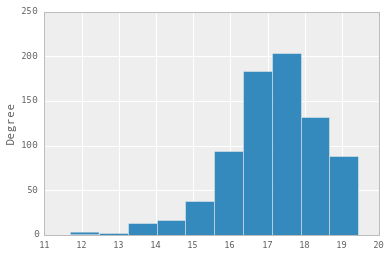

In [627]:
dfrm['ProductionBudgetLog'].plot(kind = 'hist')

In [628]:
dfrm.columns

Index([u'Movie', u'ProductionBudget', u'TotalGross', u'LTTheaters', u'OpeningWeekend', u'OpeningTheaters', u'Year', u'OpeningDate2', u'OpeningMonth', u'ClosingMonth', u'ClosingDate3', u'DaysInReleaseInt', u'WeeksInReleaseInt', u'TotalGrossLog', u'ProductionBudgetLog'], dtype='object')

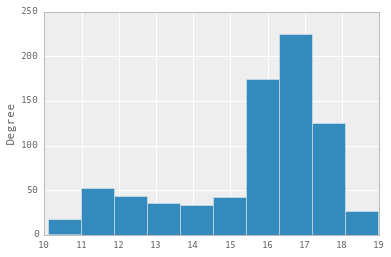

In [629]:
dfrm['OpeningWeekendLog'] = dfrm['OpeningWeekend'].apply(lambda x: np.log(x))
dfrm['OpeningWeekendLog'].plot(kind = 'hist')

In [981]:
month_year = dfrm['TotalGross'].groupby([dfrm['OpeningMonth'],dfrm['Year']]).mean()

month_year = pd.DataFrame(month_year)

print month_year.head()
print month_year.tail()
print type(month_year.head())
print type(month_year.tail())
month_year.reset_index(inplace=True)

                   TotalGross
OpeningMonth Year            
1            2009    66813940
             2010    28469023
             2011    44287878
             2012    36594470
             2013    29845709
                   TotalGross
OpeningMonth Year            
12           2010    55074317
             2011    70835772
             2012    97720167
             2013    84503317
             2014   105359447
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


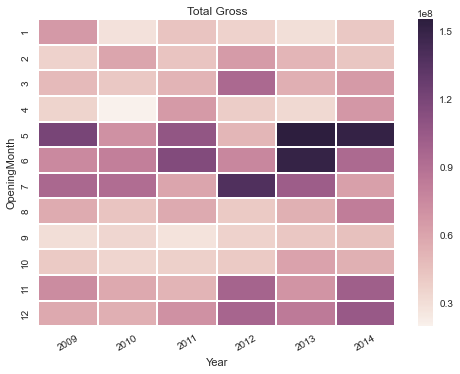

In [982]:
%matplotlib inline
import pylab as plt
import seaborn as sns
sns.set()

monthyear = month_year.pivot("OpeningMonth", "Year", "TotalGross")


ch = sns.heatmap(monthyear, linewidths=0.5)
for i in ch.get_xticklabels():
    i.set_rotation(30)

ch.set_title('Total Gross')    

In [975]:
month_year_weeks = dfrm['WeeksInReleaseInt'].groupby([dfrm['OpeningMonth'],dfrm['Year']]).mean()

month_year_weeks = pd.DataFrame(month_year_weeks)

print month_year_weeks.head()
print month_year_weeks.tail()
print type(month_year_weeks.head())
print type(month_year_weeks.tail())
month_year_weeks.reset_index(inplace=True)

                   WeeksInReleaseInt
OpeningMonth Year                   
1            2009          13.714286
             2010           9.555556
             2011          10.714286
             2012          10.500000
             2013           9.777778
                   WeeksInReleaseInt
OpeningMonth Year                   
12           2010          14.750000
             2011          15.153846
             2012          16.625000
             2013          12.692308
             2014          17.272727
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


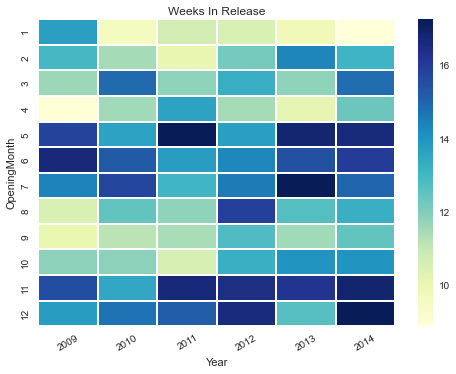

In [979]:
%matplotlib inline
import pylab as plt
import seaborn as sns
sns.set()

monthyear = month_year_weeks.pivot("OpeningMonth", "Year", "WeeksInReleaseInt")


ch = sns.heatmap(monthyear, linewidths=0.5, cmap="YlGnBu")
for i in ch.get_xticklabels():
    i.set_rotation(30)
    
ch.set_title('Weeks In Release')    

##Some Plots

I would like to have an overview of the relationship between my dependent variable TotalGross and the potential variables as well as the relationships between those variables among them. 

It is obvious that we do not need them all, some of them are highly correlated etc.

In [ ]:
dfrm.dtypes

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

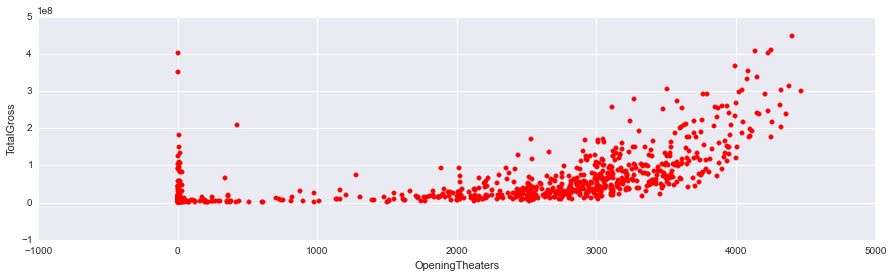

In [800]:
dfrm.plot(x='OpeningTheaters', y='TotalGross', kind='scatter', figsize=(15,4), color='red')

In [ ]:
dfrm.plot(x='LTTheaters', y='TotalGross', kind='scatter', figsize=(15,4), color='blue' )

In [ ]:
dfrm.plot(x='WeeksInReleaseInt', y='TotalGross', kind='scatter', figsize=(10,4), color='green')

In [ ]:
dfrm.plot(x='DaysInReleaseInt', y='TotalGross', kind='scatter', figsize=(15,4), color='skyblue')

In [ ]:
dfrm.plot(x='OpeningWeekend', y='TotalGross', kind='scatter', figsize=(15,4), color='blue')

In [ ]:
dfrm.plot(x='OpeningMonth', y='TotalGross', kind='scatter', figsize=(15,4), color='orange')

In [ ]:
dfrm.plot(x='ProductionBudget', y='TotalGross', kind='scatter', figsize=(15,4), color='maroon')

In [ ]:
dfrm.plot(x='Year', y='TotalGross', kind='scatter', figsize=(15,4), color='blue')

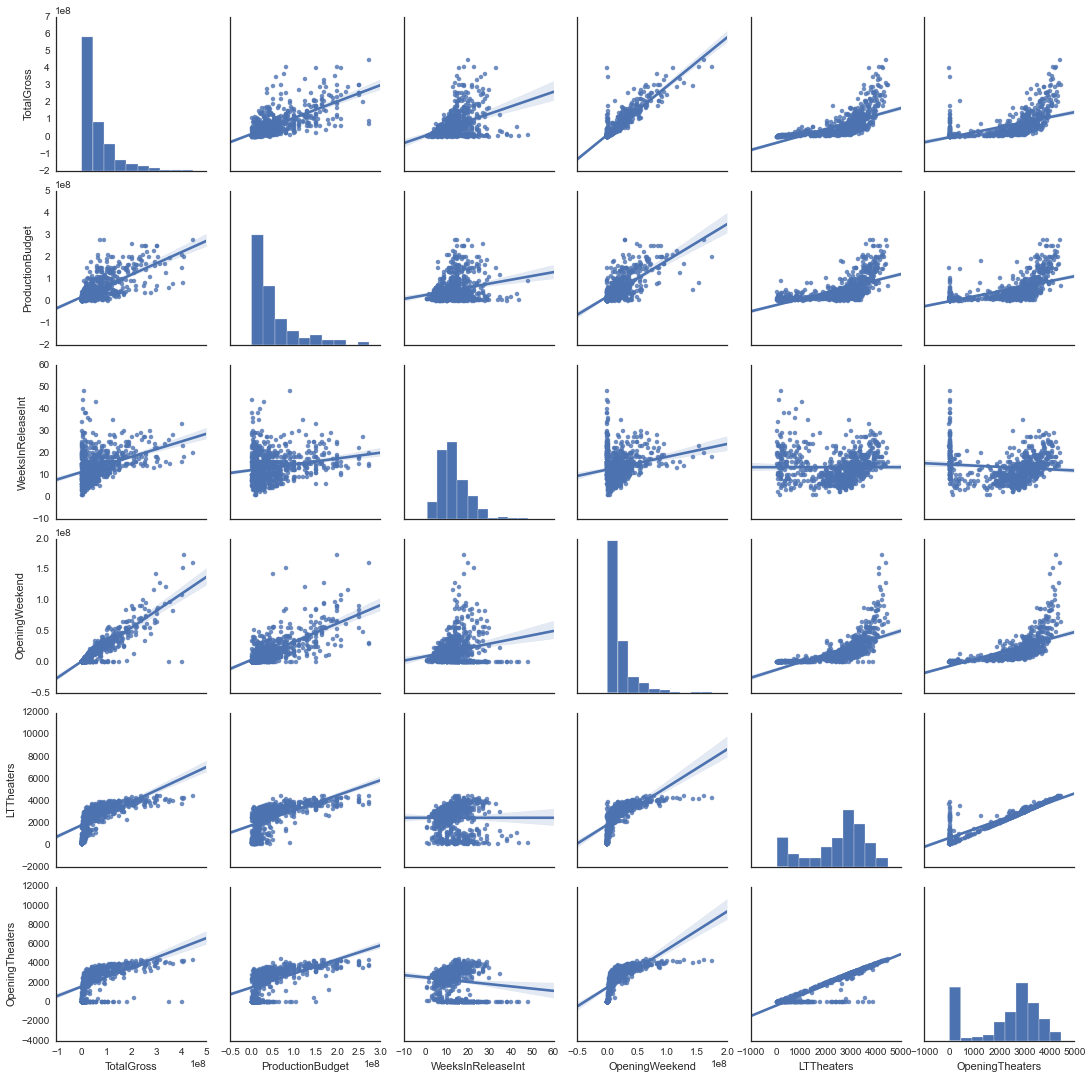

In [997]:


cols = ['TotalGross', 'ProductionBudget','WeeksInReleaseInt','OpeningWeekend','LTTheaters','OpeningTheaters']
#pd.pairplot(dfrm[cols], figsize=(20, 20), kind='reg')
sns.set_style('white')
sns.pairplot(dfrm[cols], kind="reg", palette="Paired")


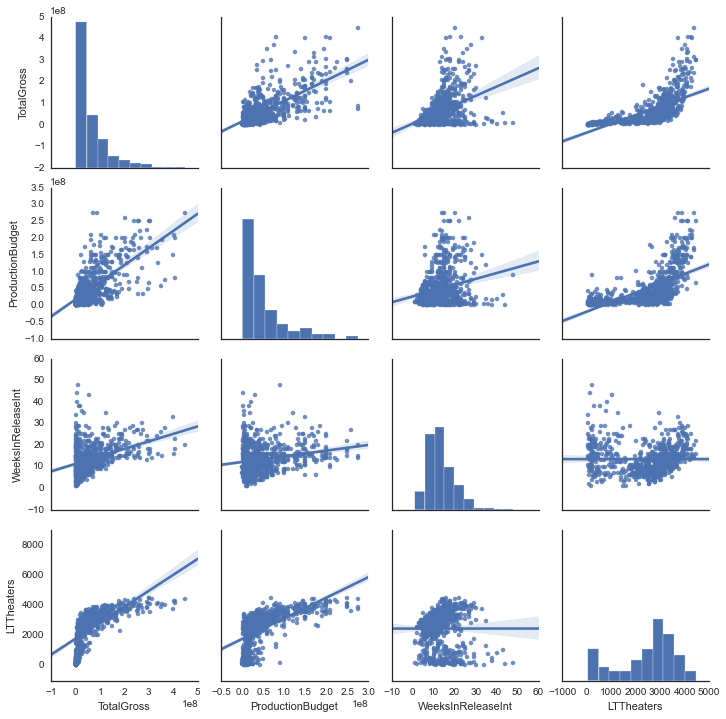

In [998]:


cols = ['TotalGross', 'ProductionBudget','WeeksInReleaseInt','LTTheaters']
#pd.pairplot(dfrm[cols], figsize=(20, 20), kind='reg')
sns.set_style('white')
sns.pairplot(dfrm[cols], kind="reg", palette="Paired")

##Before log: variables:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1599f3850>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x15b772850>]], dtype=object)

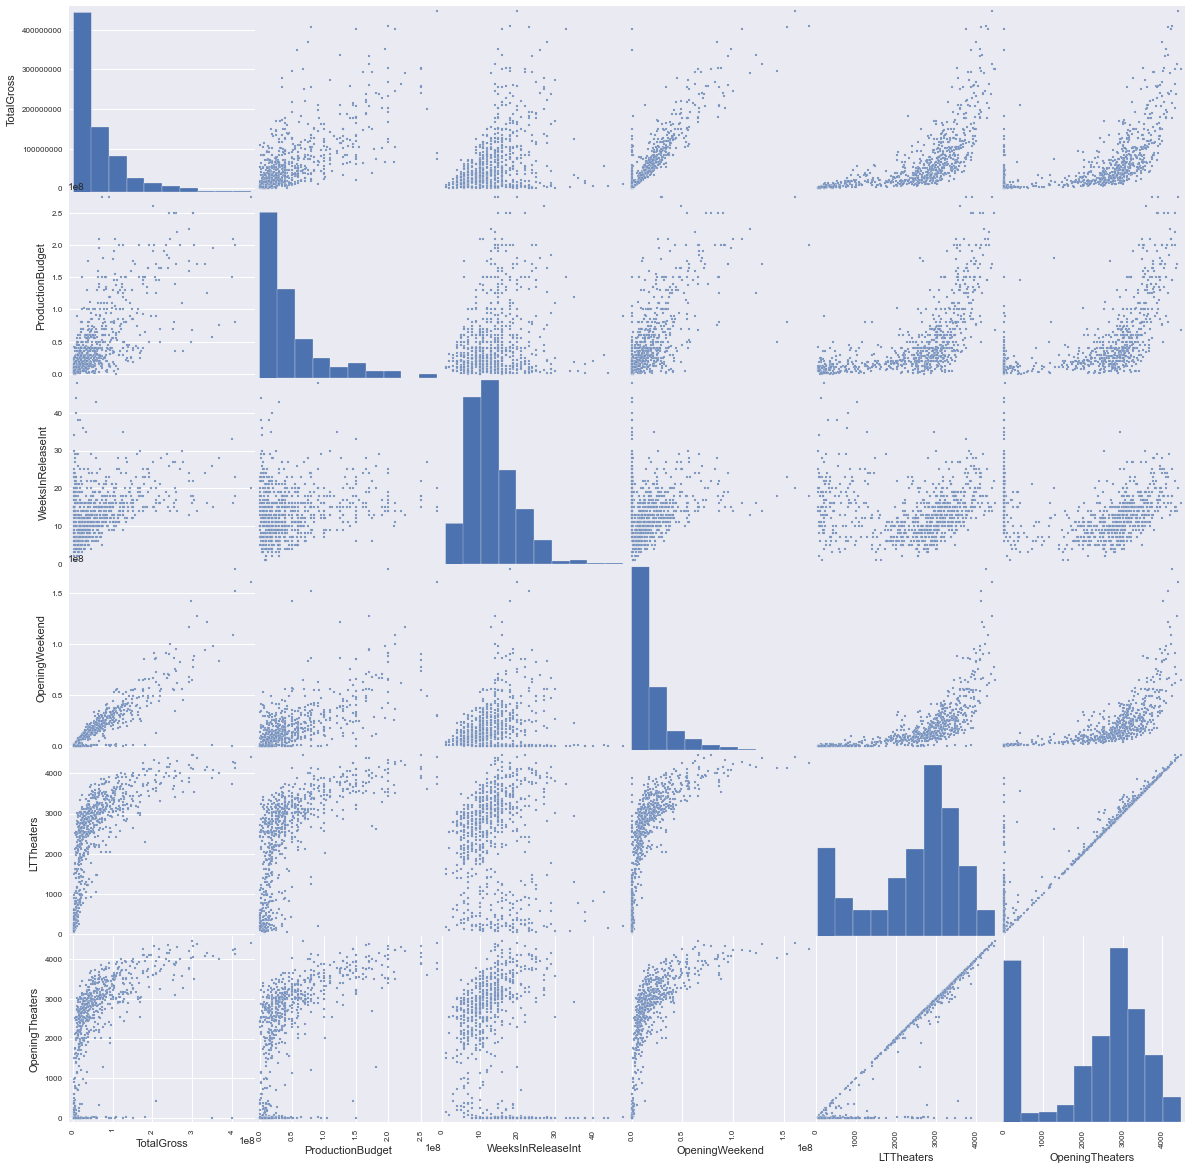

In [984]:


cols = ['TotalGross', 'ProductionBudget','WeeksInReleaseInt','OpeningWeekend','LTTheaters','OpeningTheaters']
pd.scatter_matrix(dfrm[cols], figsize=(20, 20), alpha = 1.0)
#sns.set_style('white')

##After log:

ERROR! Session/line number was not unique in database. History logging moved to new session 152


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14389c9d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x147248d10>]], dtype=object)

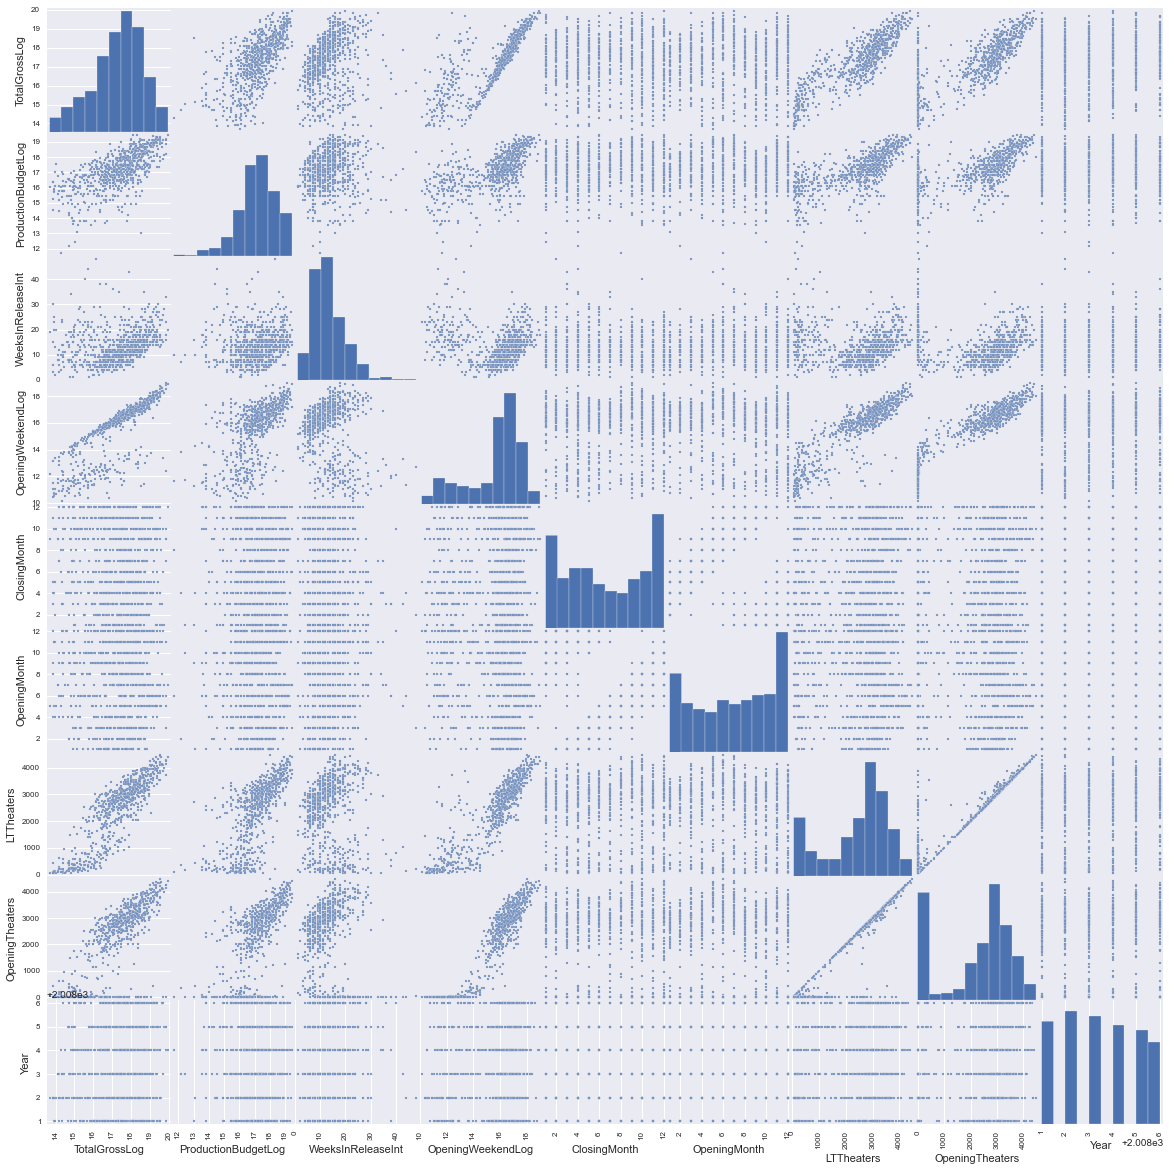

In [648]:
colsafter = ['TotalGrossLog', 'ProductionBudgetLog','WeeksInReleaseInt','OpeningWeekendLog','ClosingMonth','OpeningMonth','LTTheaters','OpeningTheaters','Year']
pd.scatter_matrix(dfrm[colsafter], figsize=(20, 20), alpha = 1.0)
#sns.set_style('white')

In [874]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [875]:
model = forward_selected(dfrm,'TotalGross')

In [876]:
print model.model.formula
print model.rsquared_adj


TotalGross ~ OpeningWeekend + WeeksInReleaseInt + LTTheaters + OpeningTheaters + OpeningDate2 + ClosingDate3 + DaysInReleaseInt + ClosingMonth + 1
0.93493370684


In [ ]:
print

##Regression? Finally 
###Not so lovely outputs though

A couple of different single linear regression models:

In [1222]:
from patsy import dmatrices
from patsy import dmatrix

In [1223]:
y, X = dmatrices('TotalGross ~ WeeksInReleaseInt', data=dfrm, return_type='dataframe')

In [1224]:
print y.shape
print X.shape

(775, 1)
(775, 2)


In [1225]:
import sklearn
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1226]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(620, 2)
(155, 2)
(620, 1)
(155, 1)


In [1227]:
y_train.head()

,TotalGross
134,30101577
756,188020017
55,301959197
407,75624550
676,15821461


In [1228]:
X_train.head()

,Intercept,WeeksInReleaseInt
134,1,4
756,1,19
55,1,22
407,1,20
676,1,8


In [1229]:
#statsmodels
import statsmodels.api as sm

In [1230]:
model = sm.OLS(y_train, X_train)
results = model.fit()

In [1231]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TotalGross   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     97.75
Date:                Fri, 09 Oct 2015   Prob (F-statistic):           1.69e-21
Time:                        03:13:23   Log-Likelihood:                -12028.
No. Observations:                 620   AIC:                         2.406e+04
Df Residuals:                     618   BIC:                         2.407e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          8.764e+06   6.01e+06      1.457      0.146     -3.05e+06  2.06e+07
WeeksInReleaseInt  3.942e+06   3.99e+05      9.887      0.000      3.16e+06  4.73e+06
==============================================================================
Omnibus:                      188.833   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.255
Skew:                           1.452   Prob(JB):                    2.47e-129
Kurtosis:                       6.807   Cond. No.                         35.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1232]:
results.params

Intercept            8764270.755554
WeeksInReleaseInt    3942102.890100
dtype: float64

In [1233]:
2*3942102.890100 

7884205.7802

In [1234]:
results.pvalues

Intercept            1.455428e-01
WeeksInReleaseInt    1.691261e-21
dtype: float64

In [1235]:
type(X_train)

pandas.core.frame.DataFrame

In [1236]:
X_train.columns

Index([u'Intercept', u'WeeksInReleaseInt'], dtype='object')

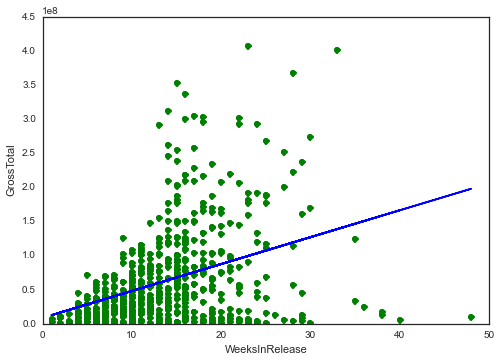

In [1237]:
plt.plot(X_train['WeeksInReleaseInt'], y_train, 'go')
plt.plot(X_train['WeeksInReleaseInt'], results.fittedvalues, 'b')
plt.xlabel('WeeksInRelease')
plt.ylabel('GrossTotal')
#plt.title('Weeks In Release vs Total Gross')

In [1238]:
results.predict(X_test)

array([  4.03010939e+07,   6.00116083e+07,   7.57800199e+07,
         4.81852997e+07,   5.21274025e+07,   5.21274025e+07,
         4.81852997e+07,   6.78958141e+07,   3.24168881e+07,
         7.97221228e+07,   1.11258946e+08,   6.00116083e+07,
         4.81852997e+07,   1.15201049e+08,   3.24168881e+07,
         4.03010939e+07,   3.63589910e+07,   2.84747852e+07,
         4.42431968e+07,   3.24168881e+07,   5.60695054e+07,
         4.03010939e+07,   2.84747852e+07,   7.18379170e+07,
         3.63589910e+07,   6.78958141e+07,   5.60695054e+07,
         4.03010939e+07,   6.39537112e+07,   4.81852997e+07,
         4.81852997e+07,   9.94326372e+07,   5.21274025e+07,
         6.39537112e+07,   7.97221228e+07,   6.78958141e+07,
         5.21274025e+07,   5.21274025e+07,   6.00116083e+07,
         6.00116083e+07,   7.18379170e+07,   7.18379170e+07,
         7.18379170e+07,   6.78958141e+07,   6.39537112e+07,
         9.94326372e+07,   6.78958141e+07,   4.81852997e+07,
         6.39537112e+07,

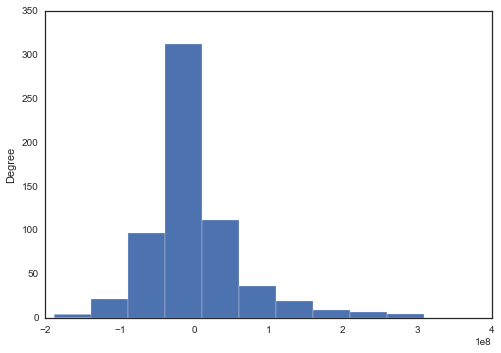

In [1239]:
results.resid.plot(kind='hist', bins=10)

In [1243]:
from sklearn.metrics import mean_squared_error

In [1241]:
predicts = results.predict(X_test)
mse = mean_squared_error(y_test, predicts)

print mse

5.86979166854e+15


In [1242]:
predicts = results.predict(X_train)
mse = mean_squared_error(y_train, predicts)

print mse

4.15037845766e+15


Total Gross vs Opening Weekend

In [1259]:
y, X = dmatrices('TotalGross ~ LTTheaters', data=dfrm, return_type='dataframe')

In [1260]:
import sklearn
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1261]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(620, 2)
(155, 2)
(620, 1)
(155, 1)


In [1262]:
y_train.head()

,TotalGross
134,30101577
756,188020017
55,301959197
407,75624550
676,15821461


In [1263]:
X_train.head()

,Intercept,LTTheaters
134,1,2523
756,1,3561
55,1,4455
407,1,3170
676,1,2544


In [1264]:
model = sm.OLS(y_train, X_train)
results2 = model.fit()

In [1265]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TotalGross   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     486.6
Date:                Fri, 09 Oct 2015   Prob (F-statistic):           5.59e-80
Time:                        03:41:18   Log-Likelihood:                -11893.
No. Observations:                 620   AIC:                         2.379e+04
Df Residuals:                     618   BIC:                         2.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -3.171e+07   4.75e+06     -6.676      0.000      -4.1e+07 -2.24e+07
LTTheaters   3.86e+04   1749.936     22.059      0.000      3.52e+04   4.2e+04
==============================================================================
Omnibus:                      240.913   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              987.284
Skew:                           1.768   Prob(JB):                    4.11e-215
Kurtosis:                       8.071   Cond. No.                     6.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

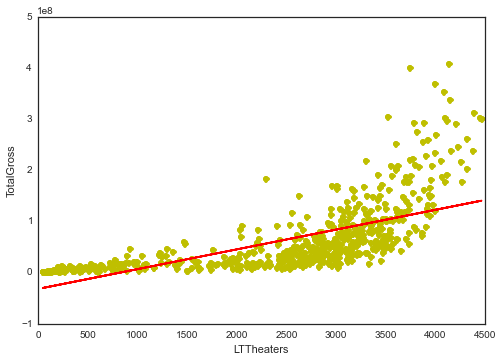

In [1272]:
plt.plot(X_train['LTTheaters'], y_train, 'yo')
plt.plot(X_train['LTTheaters'], results2.fittedvalues, 'r')
plt.xlabel('LTTheaters')
plt.ylabel('TotalGross')
#plt.title('Opening Weekend Gross vs Total Gross')

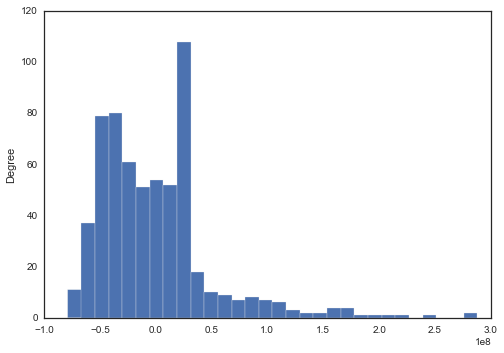

In [1273]:
results2.resid.plot(kind='hist', bins=30)

IndexError: too many indices for array

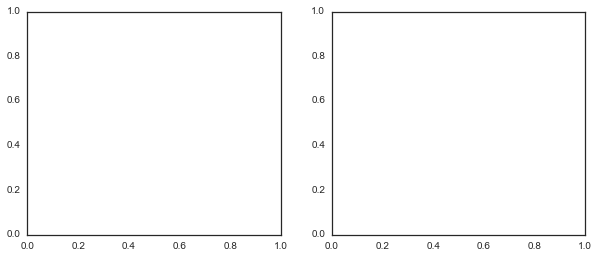

In [1274]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
axes[0,0].plot(X['OpeningWeekend'], y, 'ro')
axes[0,0].plot(X['OpeningWeekend'], results2.fittedvalues, 'b')
axes[0,0].set_xlabel('OpeningWeekend')
axes[0,0].set_ylabel('TotalGross')
axes[0,0].set_title('Opening Weekend Gross vs Total Gross')

axes[0,1].plot(X['WeeksInReleaseInt'], y, 'ro')
axes[0,1].plot(X['WeeksInReleaseInt'], results.fittedvalues, 'b')
axes[0,1].set_xlabel('WeeksInReleaseInt')
axes[0,1].set_ylabel('TotalGross')
axes[0,1].set_title('Weeks In Release vs Total Gross')

In [1275]:
predicts = results.predict(X_test)
mse = mean_squared_error(y_test, predicts)

print mse

1.14607726261e+20


In [1276]:
predicts = results.predict(X_train)
mse = mean_squared_error(y_train, predicts)

print mse

1.13032069497e+20


In [766]:
print predicts.shape

(622,)


In [767]:
print y_train.shape

(622, 1)


Production Budget vs Total Gross

In [1197]:
y, X = dmatrices('TotalGross ~ ProductionBudget', data=dfrm, return_type='dataframe')

In [1198]:
import sklearn
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1199]:
y_train.head()

,TotalGross
134,30101577
756,188020017
55,301959197
407,75624550
676,15821461


In [1200]:
X_train.head()

,Intercept,ProductionBudget
134,1,20000000
756,1,165000000
55,1,250000000
407,1,50000000
676,1,7000000


In [1201]:
model = sm.OLS(y_train, X_train)
results3 = model.fit()

In [1202]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TotalGross   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     581.8
Date:                Fri, 09 Oct 2015   Prob (F-statistic):           4.30e-91
Time:                        02:54:23   Log-Likelihood:                -11868.
No. Observations:                 620   AIC:                         2.374e+04
Df Residuals:                     618   BIC:                         2.375e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept         1.653e+07   2.76e+06      5.986      0.000      1.11e+07   2.2e+07
ProductionBudget     0.9177      0.038     24.121      0.000         0.843     0.992
==============================================================================
Omnibus:                      253.508   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1643.422
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      10.230   Cond. No.                     1.00e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1194]:
results3.params

Intercept           12515797.266530
ProductionBudget           1.012744
dtype: float64

In [1195]:
predicted = model2.predict(X_test)
print predicted

NameError: name 'model2' is not defined

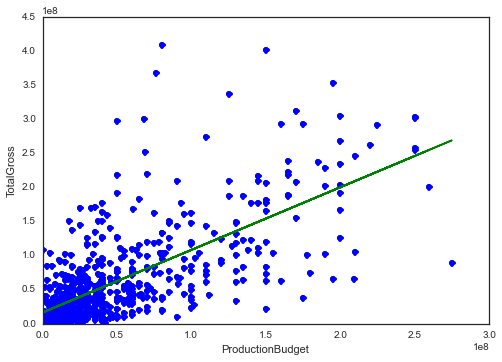

In [1203]:
plt.plot(X_train['ProductionBudget'], y_train, 'bo')
plt.plot(X_train['ProductionBudget'], results3.fittedvalues, 'g')
plt.xlabel('ProductionBudget')
plt.ylabel('TotalGross')
#plt.title('Weeks In Release vs Total Gross')

In [1205]:
results3.params

Intercept           16530635.035571
ProductionBudget           0.917696
dtype: float64

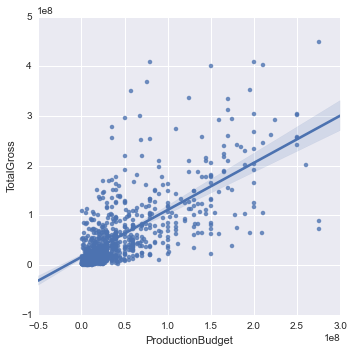

In [916]:
g = sns.lmplot(x="ProductionBudget", y="TotalGross", data=dfrm, palette="Set1")
#need studios info  

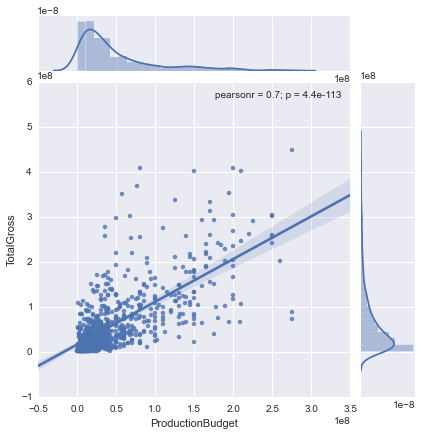

In [776]:
g = sns.jointplot(x="ProductionBudget", y="TotalGross", data=dfrm, kind = 'reg')
#need studios info  

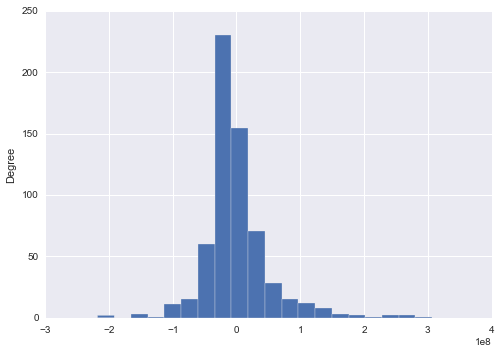

In [917]:
results3.resid.plot(kind='hist', bins=20)

In [918]:
print y_test.shape

(156, 1)


In [919]:
print X_test.shape

(156, 2)


In [920]:
print newdf.shape

(778, 22)


In [1206]:
predicts = results.predict(X_test)
mse = mean_squared_error(y_test, predicts)

print mse

8.74211800593e+28


In [1207]:
predicts = results.predict(X_train)
mse = mean_squared_error(y_train, predicts)

print mse

8.1871991438e+28


In [783]:
print predicts.shape

(622,)


###Multilinear Regression 

In [1277]:
y, X = dmatrices('TotalGross ~  ProductionBudget + LTTheaters', data=dfrm, return_type='dataframe')

In [1278]:
print X.shape
print y.shape


(775, 3)
(775, 1)


In [1279]:
import sklearn
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1280]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(620, 3)
(155, 3)
(620, 1)
(155, 1)


In [1281]:
y_train.head()

,TotalGross
134,30101577
756,188020017
55,301959197
407,75624550
676,15821461


In [1282]:
X_train.head()

,Intercept,ProductionBudget,LTTheaters
134,1,20000000,2523
756,1,165000000,3561
55,1,250000000,4455
407,1,50000000,3170
676,1,7000000,2544


In [1283]:
model = sm.OLS(y_train, X_train)
results4 = model.fit()

In [1284]:
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TotalGross   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     417.5
Date:                Fri, 09 Oct 2015   Prob (F-statistic):          2.20e-115
Time:                        03:53:16   Log-Likelihood:                -11808.
No. Observations:                 620   AIC:                         2.362e+04
Df Residuals:                     617   BIC:                         2.364e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept          -2.2e+07    4.2e+06     -5.237      0.000     -3.02e+07 -1.38e+07
ProductionBudget     0.6113      0.044     13.975      0.000         0.525     0.697
LTTheaters        2.208e+04   1930.484     11.440      0.000      1.83e+04  2.59e+04
==============================================================================
Omnibus:                      250.691   Durbin-Watson:                   2.207
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1613.428
Skew:                           1.664   Prob(JB):                         0.00
Kurtosis:                      10.168   Cond. No.                     1.68e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1285]:
results4.params

Intercept          -22000129.960246
ProductionBudget           0.611323
LTTheaters             22083.956166
dtype: float64

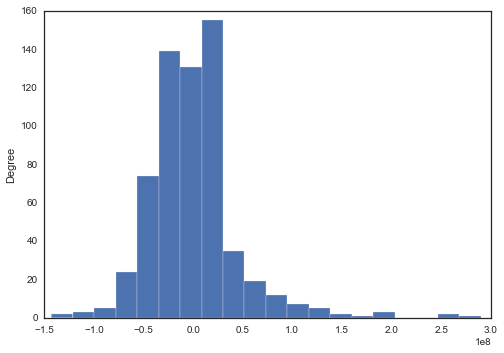

In [1286]:
results4.resid.plot(kind='Hist', bins=20)

In [1287]:
print X_test.shape

(155, 3)


In [1288]:
print y_test.shape

(155, 1)


In [1289]:
predicts = results4.predict(X_test)
mse = mean_squared_error(y_test, predicts)

print mse

3.28503236395e+15


In [1291]:
predicts = results4.predict(X_train)
mse = mean_squared_error(y_train, predicts)

print mse

2.0426924628e+15


In [1103]:
from sklearn import metrics
from sklearn.svm import SVC

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC().fit(X_train, y_train)
y_pred = clf.predict(X_test)

print "accuracy:", metrics.accuracy_score(y_test, y_pred)
print "precision:", metrics.precision_score(y_test, y_pred)
print "recall:", metrics.recall_score(y_test, y_pred)
print "f1 score:", metrics.f1_score(y_test, y_pred)

/Users/oksitosin/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:472: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
/Users/oksitosin/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


accuracy: 0.0
precision: 0.0
recall: 0.0
f1 score: 0.0


/Users/oksitosin/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/oksitosin/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1172: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/oksitosin/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:960: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/U

In [1083]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

clf = GaussianNB()
clf.fit(X_train, y_train)
y_test = clf.predict(X_test)

def plot_confusion_matrix(y_test, y_train):
    plt.imshow(metrics.confusion_matrix(y_train, y_test, cmap=plt.cm.binary, interpolation='nearest')
    #plt.colorbar()
#     plt.xlabel('true value')
#     plt.ylabel('predicted value')
    
print "classification accuracy:", metrics.accuracy_score(y_train, y_test)
plot_confusion_matrix(y_train, y_test)

SyntaxError: invalid syntax (<ipython-input-1083-21c7a52439ea>, line 14)

IndexingError: Unalignable boolean Series key provided

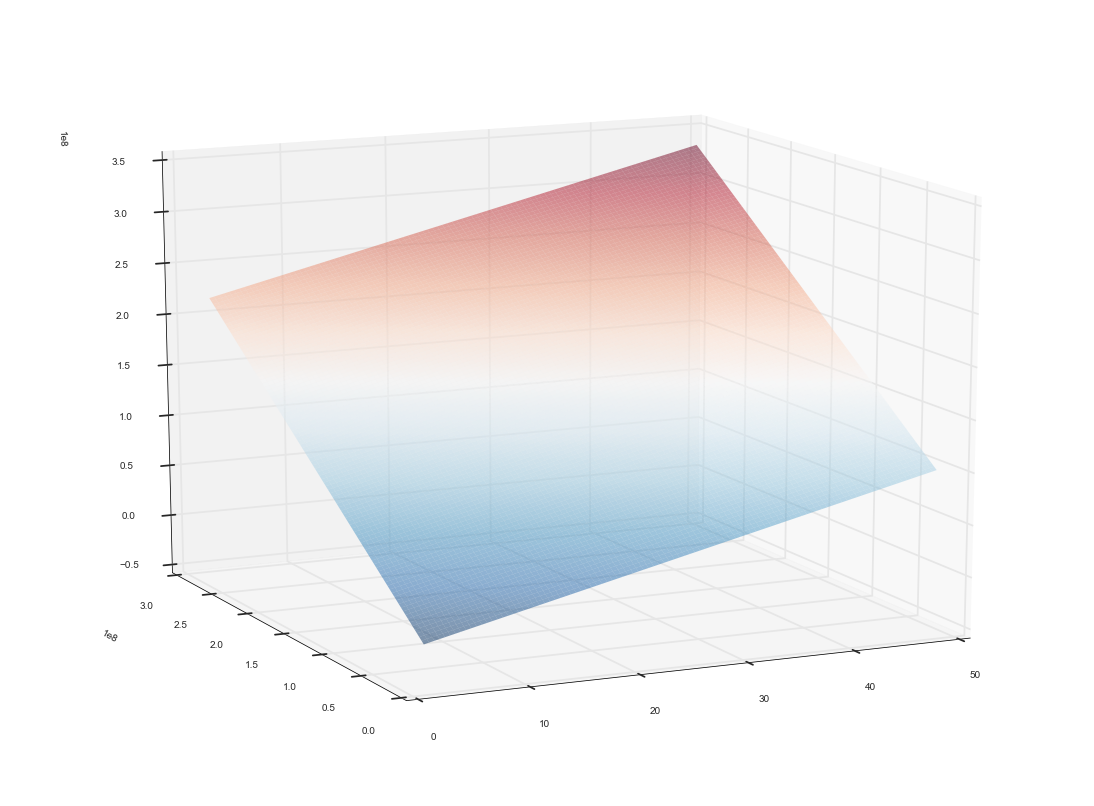

In [1070]:
from mpl_toolkits.mplot3d import Axes3D


xx1, xx2 = np.meshgrid(np.linspace(X.WeeksInReleaseInt.min(), X.WeeksInReleaseInt.max(), 1000), 
                       np.linspace(X.ProductionBudget.min(), X.ProductionBudget.max(), 1000))
# plot the hyperplane by evaluating the parameters on the grid

# create matplotlib 3d axes
fig = plt.figure(figsize=(15, 11))
ax = Axes3D(fig, azim=-115, elev=15)
Z = results4.params[0] + results4.params[1] * xx1 + results4.params[2] * xx2


# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.5, linewidth=0)

resid=results4.resid
ax.scatter(X[resid >= 0].WeeksInReleaseInt, X[resid >= 0].ProductionBudget, y[resid >= 0], color='black', alpha=1.0, facecolor='red')
ax.scatter(X[resid < 0].WeeksInReleaseInt, X[resid < 0].ProductionBudget, y[resid < 0], color='black', alpha=1.0)

ax.set_xlabel('Weeks in Release')
ax.set_ylabel('Production Budget')
ax.set_zlabel('Total Gross')

The plot above shows data points above the hyperplane in white and points below the hyperplane in black. The color of the plane is determined by the corresonding predicted TotalGross values (blue = low, red = high). 

In [1292]:
y, X = dmatrices('TotalGross ~ WeeksInReleaseInt + ProductionBudget', data=dfrm, return_type='dataframe')

In [1293]:
y.head()

,TotalGross
0,10572742
1,58715510
2,146336178
3,73034460
4,17303424


In [1294]:
X.head()

,Intercept,WeeksInReleaseInt,ProductionBudget
0,1,4,5000000
1,1,17,30000000
2,1,18,26000000
3,1,18,75000000
4,1,10,60000000


In [1295]:
model = sm.OLS(y, X)
results5 = model.fit()

In [1296]:
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TotalGross   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     457.9
Date:                Fri, 09 Oct 2015   Prob (F-statistic):          7.60e-132
Time:                        09:33:10   Log-Likelihood:                -14824.
No. Observations:                 775   AIC:                         2.965e+04
Df Residuals:                     772   BIC:                         2.967e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          -1.74e+07   4.15e+06     -4.192      0.000     -2.55e+07 -9.25e+06
WeeksInReleaseInt  2.756e+06   2.77e+05      9.967      0.000      2.21e+06   3.3e+06
ProductionBudget      0.8756      0.034     25.783      0.000         0.809     0.942
==============================================================================
Omnibus:                      249.084   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1375.931
Skew:                           1.343   Prob(JB):                    1.66e-299
Kurtosis:                       8.949   Cond. No.                     1.72e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

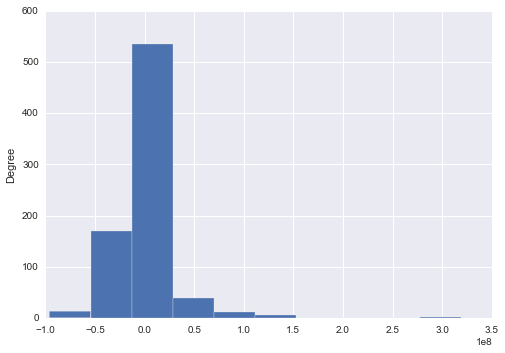

In [957]:
results5.resid.plot(kind='Hist', bins=10)

In [ ]:
predicts = results5.predict(X_test)
mse = mean_squared_error(y_test, predicts)

print mse